In [347]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 

In [348]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor

        self.alpha= 0.000000011
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )

        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        #self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            #self.rf = 2*self.r - self.rp + self.a*self.dt**2
            #self.v = (self.rf - self.rp)/(2*self.dt)

            #self.rf = self.r +self.v*self.dt + 0.5*self.a*self.dt**2
            #a=self.a
            #self.rp = self.r
            #self.r = self.rf
            #self.GetAceleration()
            #af=self.a
            #self.v = self.v + 0.5*self.dt*(af+a)

            self.rf = self.r +self.v*self.dt + 0.5*self.a*self.dt**2
            a=self.a
            self.GetAceleration()
            af=self.a
            self.v = self.v + 0.5*self.dt*(af+a)

            self.rp = self.r
            self.r = self.rf
            
            
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelioandAngle(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        angle=[]
        
        for i in range(1,len(Dist)-1):
            if Dist[i-1] < Dist[i] and Dist[i+1]< Dist[i]:
            #if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
                #an= np.arctan(self.R[i][1]/Dist[i])
                #an= np.arctan(self.R[i][1]/self.R[i][0])
                an= np.arcsin(self.R[i][1]/Dist[i])
                angle.append(an)
            
        return timeup,angle

In [349]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.205630,0.387098,t)

    return [Mercurio]


In [350]:
dt = 0.0001
#dt = 0.0001
tmax = 2.5
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [351]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [352]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 25000/25000 [00:04<00:00, 5760.25 Steps/s] 


In [353]:
period,angles=Planetas[0].GetPerihelioandAngle()


In [354]:
scale = 20
t1 = t[::scale]

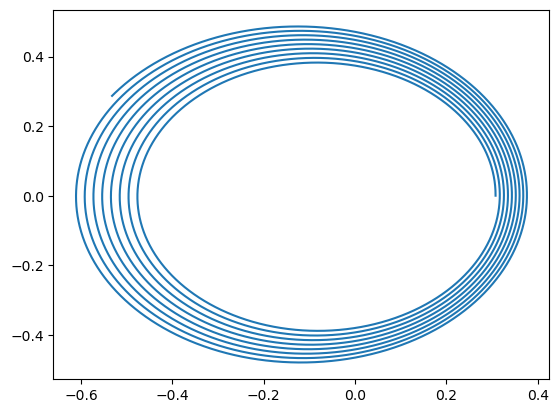

In [355]:
plt.plot(Planetas[0].GetPosition()[:,0],Planetas[0].GetPosition()[:,1])

In [356]:
def getTime(perihelio,angles):

    tiempo=[]
    angulos=[]
    
    #for i in range(1,len(perihelio)):

        #t=np.abs(perihelio[i]-perihelio[i-1])
        #tiempo.append(2*t)
        #a=np.abs(angles[i]-angles[i-1])
        #ang=a*2*57.296
        #angulos.append(ang)

    for i in range(len(perihelio)):

        tiempo.append(2*perihelio[i])
        angulos.append(2*angles[i]*(57.296))


    #for i in range(len(perihelio)):

     #   tiempo.append(2*perihelio[i])
        
    #angulos.append(angles[0]*2*(57.296))

    #for i in range(1,len(perihelio)):

       # a=np.abs(angles[i]-angles[i-1])
        #angulos.append(2*a*(57.296))



    return tiempo, angulos

In [357]:
x,y= getTime(period, angles)

print(len(period))


#-0.052097091270883814 y/x
#-0.05209709127088381
#0.05207932375748331 y/dist

8


In [358]:
def linearReg(x,y):

    n = len(x)
    avx = np.mean(x)
    avy = np.mean(y) 
    a1 = sum((x[i]-avx)*(y[i]-avy) for i in range(n))
    a2 = sum((x[i]-avx)**2 for i in range(n))
    m = a1/a2
    b = avy-(m*avx)
    
    return m, b

m,b = linearReg(x,y)
print("pendiente")
print(str(m))
print(str(m*3600*100))

pendiente
0.22662003897502978
81583.21403101072


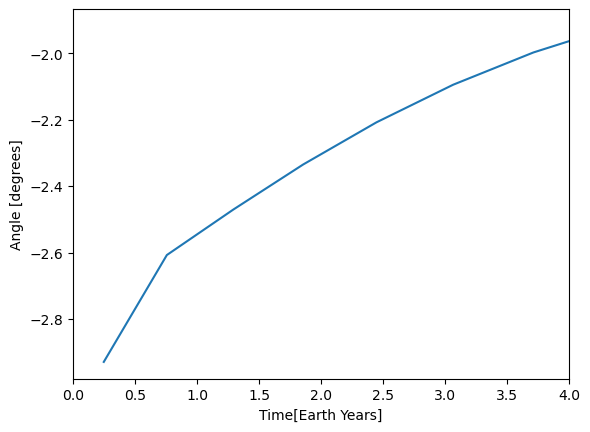

In [359]:
plt.plot(x, y)
plt.xlim(0,4)

plt.xlabel('Time[Earth Years]')
plt.ylabel('Angle [degrees]')

plt.show()